### Loading the packages and the Gym Environment 

In [1]:
import os
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import time
from envs import TradingEnv

def cost(delta_h, multiplier):
    TickSize = 0.1
    return multiplier * TickSize * (np.abs(delta_h) + 0.01 * delta_h**2)


### Getting the cost of hedging distribution using the cost given in Du et al. 

1. generate asset price paths
2. generate BS price and delta
simulation done!


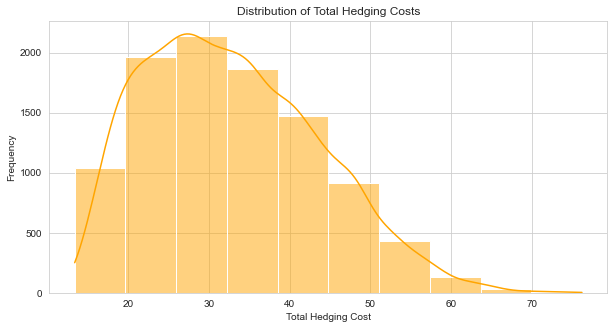

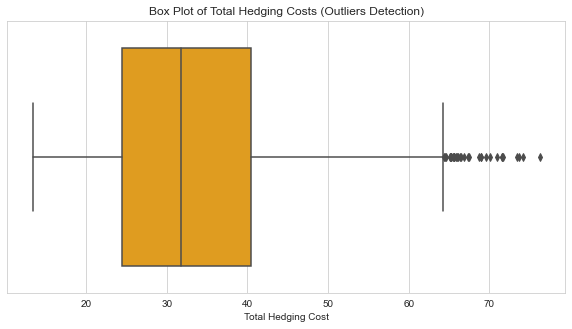

In [11]:
vol = 0.01 * np.sqrt(250)
cost_multiplier = 1


bs_env = TradingEnv(continuous_action_flag=True, sabr_flag=False, 
                    dg_random_seed= 1, spread=0.005, num_contract=1, 
                    init_ttm=10, trade_freq=0.2, num_sim= 10000,kappa =0.1, cost_multiplier=cost_multiplier,
                        mu =0, vol = vol, S = 100, K = 100, r = 0, q = 0)



delta_path = bs_env.delta_path*100
delta_path = np.insert(delta_path, 0, 0, axis=1)
delta_h = np.diff(delta_path, axis=1)
transaction_costs = cost(delta_h, multiplier=cost_multiplier)

total_costs = np.sum(transaction_costs, axis =1)




# df = pd.DataFrame({"Sample Path ": np.arange(1, 11), "Total Cost" : total_costs})
# with open("hedging_costs_table.tex", "w") as f:
#     f.write(df.to_latex(index=False))

sns.set_style("whitegrid")
# Plot histogram for the distribution of total hedging costs
plt.figure(figsize=(10, 5))
sns.histplot(total_costs, bins=10, kde=True, color="orange")
plt.xlabel("Total Hedging Cost")
plt.ylabel("Frequency")
plt.title("Distribution of Total Hedging Costs")
plt.savefig("bsdelta_plots/hedging_costs_hist_small_dt.png")
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=total_costs, color="orange")
plt.xlabel("Total Hedging Cost")
plt.title("Box Plot of Total Hedging Costs (Outliers Detection)")
plt.savefig("bsdelta_plots/hedging_costs_boxplot_small_dt.png")
plt.show()


1. generate asset price paths
2. generate BS price and delta
simulation done!
1. generate asset price paths
2. generate BS price and delta
simulation done!
1. generate asset price paths
2. generate BS price and delta
simulation done!
1. generate asset price paths
2. generate BS price and delta
simulation done!
1. generate asset price paths
2. generate BS price and delta
simulation done!


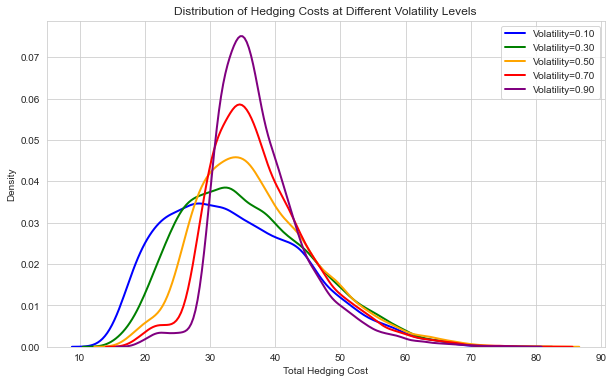

In [3]:
# Calculate and plot cost distribution at different levels of volatility

volatilities = [ 0.1, 0.3, 0.5, 0.7, 0.9]
colors = ["blue", "green", "orange", "red", "purple", "brown"]
num_simulations = 10000

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

for i, vol in enumerate(volatilities):
    bs_env = TradingEnv(
        continuous_action_flag=True, sabr_flag=False,
        dg_random_seed=1, spread=0.005, num_contract=1,
        init_ttm=10, trade_freq=0.2, num_sim=num_simulations,
        kappa=0.1, cost_multiplier=cost_multiplier, mu=0, vol=vol* np.sqrt(250), S=100, K=100, r=0, q=0
    )
    delta_path = bs_env.delta_path * 100
    delta_path = np.insert(delta_path, 0, 0, axis=1)
    delta_h = np.diff(delta_path, axis=1)
    transaction_costs = cost(delta_h, multiplier=cost_multiplier)
    total_costs = np.sum(transaction_costs, axis=1)
    sns.kdeplot(total_costs, label=f"Volatility={vol:.2f}", color=colors[i], linewidth=2)

plt.xlabel("Total Hedging Cost")
plt.ylabel("Density")
plt.title("Distribution of Hedging Costs at Different Volatility Levels")
plt.savefig("bsdelta_plots/hedging_costs_distribution_volatility.png")
plt.legend()

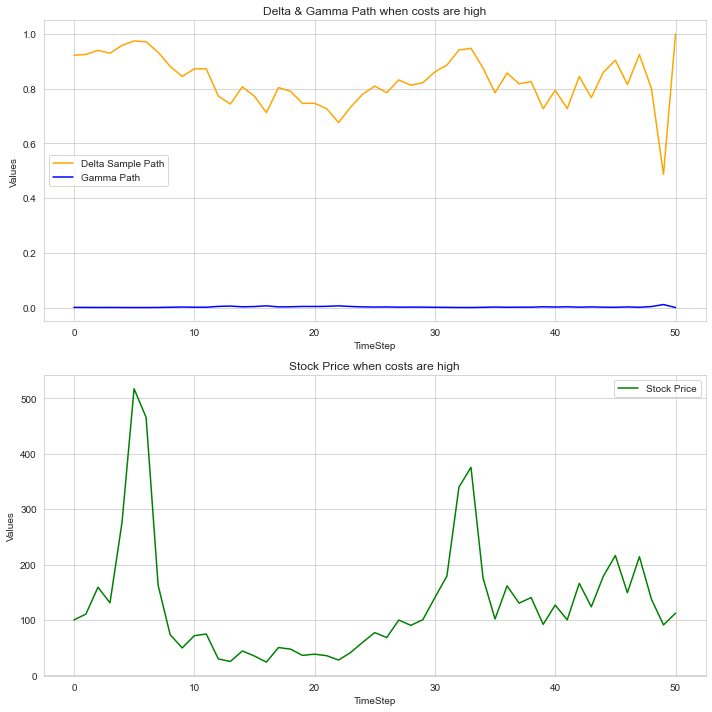

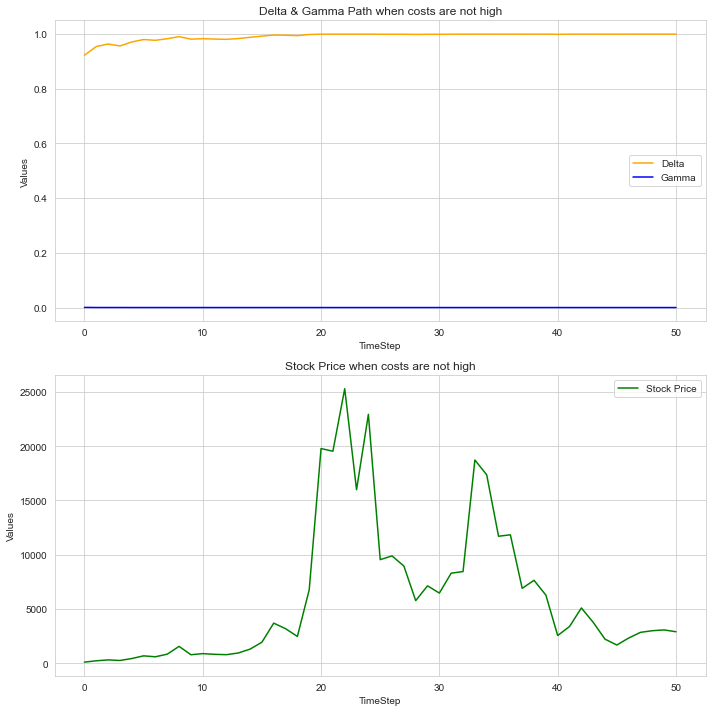

In [7]:
outlier_cost = 40
low_cost = 20
high_cost_indices = np.where(total_costs > outlier_cost)
low_cost_indices = np.where(total_costs <= low_cost)

# When costs are high
fig, axs = plt.subplots(2, 1, figsize=(10, 10 ))

axs[0].plot(bs_env.delta_path[ high_cost_indices[0][1], :], label="Delta Sample Path", color="orange")
axs[0].plot(bs_env.gamma_path[ high_cost_indices[0][1], :], label="Gamma Path", color="blue")
axs[0].set_xlabel("TimeStep")
axs[0].set_ylabel("Values")
axs[0].set_title("Delta & Gamma Path when costs are high")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(bs_env.path[ high_cost_indices[0][1], :], label="Stock Price", color="green")
axs[1].set_xlabel("TimeStep")
axs[1].set_ylabel("Values")
axs[1].set_title("Stock Price when costs are high")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig("bsdelta_plots/Delta_Gamma_High")
plt.show()

# When costs are low
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(bs_env.delta_path[low_cost_indices[0][1], :], label="Delta", color="orange")
axs[0].plot(bs_env.gamma_path[low_cost_indices[0][1], :], label="Gamma", color="blue")
axs[0].set_xlabel("TimeStep")
axs[0].set_ylabel("Values")
axs[0].set_title("Delta & Gamma Path when costs are not high")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(bs_env.path[low_cost_indices[0][1], :], label="Stock Price", color="green")
axs[1].set_xlabel("TimeStep")
axs[1].set_ylabel("Values")
axs[1].set_title("Stock Price when costs are not high")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig("bsdelta_plots/Delta_Gamma_Low")
plt.show()

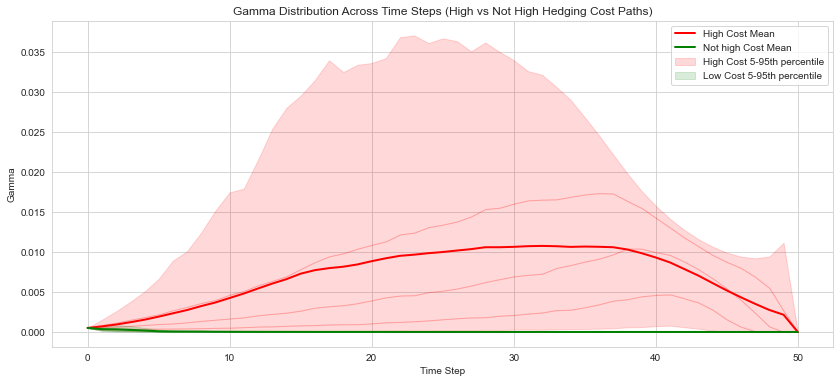

In [8]:
# Distribution of gamma along time steps for high and low cost paths

# Get indices for high and low cost paths
outlier_cost = 40
low_cost = 20
high_cost_indices = np.where(total_costs > outlier_cost)[0]
low_cost_indices = np.where(total_costs <= low_cost)[0]

# Extract gamma paths
gamma_high = bs_env.gamma_path[high_cost_indices, :]  # shape: (num_high, num_timesteps)
gamma_low = bs_env.gamma_path[low_cost_indices, :]    # shape: (num_low, num_timesteps)

# Compute mean and percentiles along time steps
mean_gamma_high = np.mean(gamma_high, axis=0)
mean_gamma_low = np.mean(gamma_low, axis=0)
percentiles = [5, 25, 50, 75, 95]
gamma_high_percentiles = np.percentile(gamma_high, percentiles, axis=0)
gamma_low_percentiles = np.percentile(gamma_low, percentiles, axis=0)

# Plot both high and low cost gamma distributions in one plot with shaded percentiles

plt.figure(figsize=(14, 6))

# High cost paths
plt.plot(mean_gamma_high, label='High Cost Mean', color='red', linewidth=2)
for i in range(len(percentiles)-1):
    plt.fill_between(
        np.arange(mean_gamma_high.shape[0]),
        gamma_high_percentiles[i],
        gamma_high_percentiles[i+1],
        color='red',
        alpha=0.15,
        label=f'High Cost {percentiles[0]}-{percentiles[-1]}th percentile' if i == len(percentiles)-2 else None
    )

# Low cost paths
plt.plot(mean_gamma_low, label='Not high Cost Mean', color='green', linewidth=2)
for i in range(len(percentiles)-1):
    plt.fill_between(
        np.arange(mean_gamma_low.shape[0]),
        gamma_low_percentiles[i],
        gamma_low_percentiles[i+1],
        color='green',
        alpha=0.15,
        label=f'Low Cost {percentiles[0]}-{percentiles[-1]}th percentile' if i == len(percentiles)-2 else None
    )

plt.xlabel('Time Step')
plt.ylabel('Gamma')
plt.title('Gamma Distribution Across Time Steps (High vs Not High Hedging Cost Paths)')
plt.savefig("bsdelta_plots/Gamma_Distribution_High_Low")
plt.legend()

### Regression Analysis of Hedging Costs against the Average Gamma. 


Call:
LinearRegression(formula = total_costs ~ avg_gamma)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.307  -2.338  -0.215  1.811  27.682

Coefficients:
            Estimate    Std. Error    t value    Pr(>|t|)    
(Intercept) 5.76426   0.11793   48.88   0.00e+00    
avg_gamma   220.17060   0.89683   245.50   0.00e+00    

Residual standard error: 4.066 on 9998 degrees of freedom
Multiple R-squared:  0.8577, Adjusted R-squared:  0.8577
F-statistic: 60269.70 on 1 and 9998 DF,  p-value: 1.11e-16



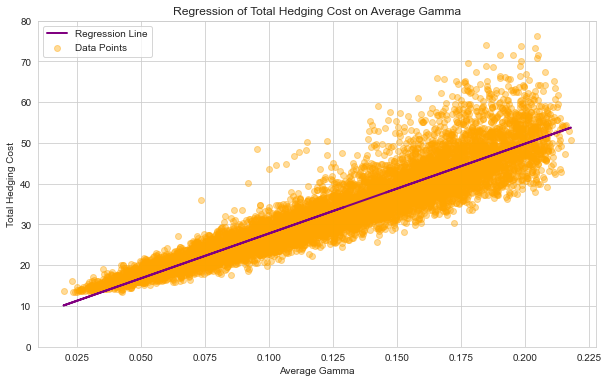

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import t, f
import numpy as np

# Data
avg_gamma = np.average(bs_env.gamma_path, axis=1)
total_costs = np.sum(transaction_costs, axis=1)

X = avg_gamma.reshape(-1, 1)
y = total_costs

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Residuals
residuals = y - y_pred

# Degrees of freedom
n = len(y)  # Number of observations
p = X.shape[1] + 1  # Number of predictors + intercept
df_residual = n - p  # Residual degrees of freedom
df_model = p - 1  # Model degrees of freedom

# Standard error of residuals
residual_std_error = np.sqrt(np.sum(residuals**2) / df_residual)

# Coefficients and standard errors
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept
coef_cov_matrix = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * residual_std_error**2
std_errors = np.sqrt(np.diag(coef_cov_matrix))

# t-values and p-values for coefficients
t_values = model.coef_ / std_errors[1:]
t_values = np.insert(t_values, 0, model.intercept_ / std_errors[0])  # Add intercept t-value
p_values = [2 * (1 - t.cdf(np.abs(t_val), df_residual)) for t_val in t_values]

# R-squared and adjusted R-squared
r_squared = r2_score(y, y_pred)
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / df_residual

# F-statistic and p-value
ssr = np.sum((y_pred - np.mean(y))**2)  # Regression sum of squares
sse = np.sum(residuals**2)  # Sum of squared errors
msr = ssr / df_model  # Mean square regression
mse = sse / df_residual  # Mean square error
f_stat = msr / mse  # F-statistic
f_p_value = 1 - f.cdf(f_stat, df_model, df_residual)

# Summary
summary = f"""
Call:
LinearRegression(formula = total_costs ~ avg_gamma)

Residuals:
    Min      1Q  Median      3Q     Max 
{np.min(residuals):.3f}  {np.percentile(residuals, 25):.3f}  {np.median(residuals):.3f}  {np.percentile(residuals, 75):.3f}  {np.max(residuals):.3f}

Coefficients:
            Estimate    Std. Error    t value    Pr(>|t|)    
(Intercept) {model.intercept_:.5f}   {std_errors[0]:.5f}   {t_values[0]:.2f}   {p_values[0]:.2e}    
avg_gamma   {model.coef_[0]:.5f}   {std_errors[1]:.5f}   {t_values[1]:.2f}   {p_values[1]:.2e}    

Residual standard error: {residual_std_error:.3f} on {df_residual} degrees of freedom
Multiple R-squared:  {r_squared:.4f}, Adjusted R-squared:  {adj_r_squared:.4f}
F-statistic: {f_stat:.2f} on {df_model} and {df_residual} DF,  p-value: {f_p_value:.2e}
"""

print(summary)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='orange', alpha=0.4, label='Data Points')
plt.plot(X, y_pred, color='purple', linewidth=2, label='Regression Line')
plt.xlabel('Average Gamma')
plt.ylabel('Total Hedging Cost')
plt.ylim(0, 80)
plt.title('Regression of Total Hedging Cost on Average Gamma')
plt.legend()
plt.savefig("bsdelta_plots/Hedging_Costs_Regression.png")
plt.show()

In [ ]:
import numpy as np
# Apply log transformation to avg_gamma and total_costs
X_transformed = np.log(avg_gamma + 1)  # Add 1 to avoid log(0)
y_transformed = np.log(total_costs + 1)

# Fit the transformed model
model_transformed = LinearRegression()
model_transformed.fit(X_transformed.reshape(-1, 1), y_transformed)

# Predictions
y_pred_transformed = model_transformed.predict(X_transformed.reshape(-1, 1))

# Evaluate the fit
r_squared_transformed = r2_score(y_transformed, y_pred_transformed)
print(f"R-squared (Log Transformed): {r_squared_transformed:.4f}")

NameError: name 'avg_gamma' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import t

# Data
avg_gamma = np.average(bs_env.gamma_path, axis=1)
total_costs = np.sum(transaction_costs, axis=1)

X = avg_gamma.reshape(-1, 1)
y = total_costs


y = np.log(y + 1)

# Fit the regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Residuals
residuals = y - y_pred

# Degrees of freedom
n = len(y)
p = X.shape[1] + 1  # Number of predictors + intercept
df = n - p

# Standard error of residuals
residual_std_error = np.sqrt(np.sum(residuals**2) / df)

# Coefficients and standard errors
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept
coef_cov_matrix = np.linalg.inv(X_with_intercept.T @ X_with_intercept) * residual_std_error**2
std_errors = np.sqrt(np.diag(coef_cov_matrix))

# t-values and p-values
t_values = model.coef_ / std_errors[1:]
t_values = np.insert(t_values, 0, model.intercept_ / std_errors[0])  # Add intercept t-value
p_values = [2 * (1 - t.cdf(np.abs(t_val), df)) for t_val in t_values]

# R-squared and adjusted R-squared
r_squared = r2_score(y, y_pred)
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p)

# F-statistic
f_stat = (r_squared / (1 - r_squared)) * (df / (p - 1))
f_p_value = 1 - t.cdf(f_stat, p - 1)

# Summary
summary = f"""
Call:
LinearRegression(formula = total_costs ~ avg_gamma)

Residuals:
    Min      1Q  Median      3Q     Max 
{np.min(residuals):.3f}  {np.percentile(residuals, 25):.3f}  {np.median(residuals):.3f}  {np.percentile(residuals, 75):.3f}  {np.max(residuals):.3f}

Coefficients:
            Estimate    Std. Error    t value    Pr(>|t|)    
(Intercept) {model.intercept_:.5f}   {std_errors[0]:.5f}   {t_values[0]:.2f}   {p_values[0]:.2e}    
avg_gamma   {model.coef_[0]:.5f}   {std_errors[1]:.5f}   {t_values[1]:.2f}   {p_values[1]:.2e}    

Residual standard error: {residual_std_error:.3f} on {df} degrees of freedom
Multiple R-squared:  {r_squared:.4f}, Adjusted R-squared:  {adj_r_squared:.4f}
F-statistic: {f_stat:.1f} on {p - 1} and {df} DF,  p-value: {f_p_value:.2e}
"""

print(summary)


Call:
LinearRegression(formula = total_costs ~ avg_gamma)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.721  -0.087  -0.015  0.080  0.696

Coefficients:
            Estimate    Std. Error    t value    Pr(>|t|)    
(Intercept) 3.71481   0.00245   1513.46   0.00e+00    
avg_gamma   -5.90593   0.14788   -39.94   0.00e+00    

Residual standard error: 0.161 on 9998 degrees of freedom
Multiple R-squared:  0.1376, Adjusted R-squared:  0.1375
F-statistic: 1594.9 on 1 and 9998 DF,  p-value: 2.00e-04



In [ ]:
from scipy.stats import ks_2samp

avg_gamma = np.average(bs_env.gamma_path, axis = 1)

high_cost_gamma= avg_gamma[high_cost_indices]
low_cost_gamma = avg_gamma[low_cost_indices]
num_path = len(high_cost_gamma)
sns.set_style("whitegrid")
# Plot histogram for the distribution of total hedging costs
plt.figure(figsize=(10, 5))
sns.kdeplot(high_cost_gamma, color="red", label = f"High Cost TC > {outlier_cost}", shade = False)
sns.kdeplot(low_cost_gamma, color="green", label = f"Not High Cost TC <= {low_cost}", shade = False)
plt.legend()
plt.xlabel("Average Gamma")
plt.ylabel("Density")
plt.title("Distribution of Average Gamma")
plt.savefig("bsdelta_plots/High_vs_Low Hedging Cost Gamma dist.png")
plt.show()

ks_statistic , p_value = ks_2samp(low_cost_gamma, high_cost_gamma)

print(f"Kolmogorov–Smirnov Statistic: {ks_statistic}")
print(f"P-value: {p_value}")
 
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The two samples come from different distributions.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest different distributions.")

### Testing Rebalancing Frequency on Hedging Cost

In [ ]:
rebalance_frequencies = [1,2,5,10]  
colors = ["blue", "green", "orange", "red"]  # Different colors for each distribution
num_simulations = 10000

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

for i, freq in enumerate(rebalance_frequencies):
    # Create environment with given rebalancing frequency
    bs_env = TradingEnv(continuous_action_flag=True, sabr_flag=False, 
                        dg_random_seed=1, spread=0.01, num_contract=1, 
                        init_ttm=10, trade_freq=1/freq, num_sim=num_simulations,
                        mu=0, vol=0.01, S=100, K=100, r=0, q=0)

    # Compute total hedging cost
    delta_path = bs_env.delta_path * 100
    delta_path = np.insert(delta_path, 0, 0, axis=1)
    delta_h = np.diff(delta_path, axis=1)
    transaction_costs = cost(delta_h, multiplier=5)
    total_costs = np.sum(transaction_costs, axis=1)

    # Plot KDE for the current rebalancing frequency
    sns.kdeplot(total_costs, label=f"{freq} trades/day", color=colors[i], linewidth=2)

# Graph formatting
plt.xlabel("Total Hedging Cost")
plt.ylabel("Density")
plt.title("Effect of Rebalancing Frequency on Hedging Costs")
plt.legend()
plt.savefig("hedging_costs_Rebalancing.png")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes delta calculation for call options
def black_scholes_delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Parameters
S = np.linspace(50, 150, 100)  # Range of underlying asset prices
K = 100  # Strike price
T = 1  # Time to maturity (10 days)
r = 0  # Risk-free interest rate
volatilities = [0.1, 0.2, 0.3, 0.4, 0.5]  # Different levels of volatility

# Plot delta for different levels of volatility
plt.figure(figsize=(10, 6))
for sigma in volatilities:
    delta_call_values = black_scholes_delta_call(S, K, T, r, sigma)
    plt.plot(S, delta_call_values, label=f'Volatility = {sigma}')

plt.axvline(x=K, color='black', linestyle='--', label='Strike Price (ATM)')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Delta')
plt.title('Delta as a Function of Underlying Asset Price for Different Volatilities')
plt.legend()
plt.grid(True)
plt.savefig("bsdelta_plots/bs_delta_stock_price.png")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes delta calculation for call options
def black_scholes_delta_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    return delta

# Parameters
S = np.linspace(50, 150, 100)  # Range of underlying asset prices
K = 100  # Strike price
r = 0  # Risk-free interest rate
sigma = 0.2  # Constant volatility
times_to_maturity = [10/252, 30/252, 60/252, 90/252, 180/252]  # Different times to maturity (in years)

# Plot delta for different times to maturity
plt.figure(figsize=(10, 6))
for T in times_to_maturity:
    delta_call_values = black_scholes_delta_call(S, K, T, r, sigma)
    plt.plot(S, delta_call_values, label=f'Time to Maturity = {T*252:.0f} days')

plt.axvline(x=K, color='black', linestyle='--', label='Strike Price (ATM)')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Delta')
plt.title('Delta as a Function of Underlying Asset Price for Different Times to Maturity')
plt.legend()
plt.grid(True)
plt.savefig("bsdelta_plots/bs_delta_time_to_maturity.png")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes gamma calculation
def black_scholes_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

# Parameters
S = np.linspace(50, 150, 100)  # Range of underlying asset prices
K = 100  # Strike price
T = 10/252 # Time to maturity (1 year)
r = 0.05  # Risk-free interest rate
volatilities = [0.05, 0.2, 0.3, 0.4, 0.5]  # Different levels of volatility

# Plot gamma for different levels of volatility
plt.figure(figsize=(10, 6))
for sigma in volatilities:
    gamma_values = black_scholes_gamma(S, K, T, r, sigma)
    plt.plot(S, gamma_values, label=f'Volatility = {sigma}')

plt.axvline(x=K, color='red', linestyle='--', label='Strike Price (ATM)')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Gamma')
plt.title('Gamma as a Function of Underlying Asset Price for Different Volatilities')
plt.legend()
plt.grid(True)
plt.savefig("bsdelta_plots/bs_gamma_vol.png")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes gamma calculation
def black_scholes_gamma(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

# Parameters
S = np.linspace(50, 150, 100)  # Range of underlying asset prices
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Constant volatility
times_to_maturity = [10/252, 30/252, 60/252, 90/252, 180/252]  # Different times to maturity (in years)

# Plot gamma for different times to maturity
plt.figure(figsize=(10, 6))
for T in times_to_maturity:
    gamma_values = black_scholes_gamma(S, K, T, r, sigma)
    plt.plot(S, gamma_values, label=f'Time to Maturity = {T*252:.0f} days')

plt.axvline(x=K, color='red', linestyle='--', label='Strike Price (ATM)')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Gamma')
plt.title('Gamma as a Function of Underlying Asset Price for Different Times to Maturity')
plt.legend()
plt.grid(True)
plt.savefig("bsdelta_plots/bs_gamma_time_to_maturity.png")
plt.show()

# Total Profit & Loss Analysis 

In [ ]:
from scipy.stats import kstest,shapiro
from scipy.stats import skew, kurtosis

vol = 0.01 * np.sqrt(250)

bs_env = TradingEnv(continuous_action_flag=True, sabr_flag=False, 
                dg_random_seed= None , spread=0.005, num_contract=1, 
                init_ttm=10, trade_freq=1/5, num_sim= 10000,
                    mu =0, vol = vol, S = 100, K = 100, r = 0, q = 0)


delta_path = bs_env.delta_path*100
delta_path_append = np.insert(delta_path, 0, 0, axis=1)
delta_path.shape

In [ ]:
from scipy.stats import kstest,shapiro
from scipy.stats import skew, kurtosis

vol = 0.01 * np.sqrt(250)

bs_env = TradingEnv(continuous_action_flag=True, sabr_flag=False, 
                dg_random_seed= None , spread=0.005, num_contract=1, 
                init_ttm=10, trade_freq=1/5, num_sim= 10000,
                    mu =0, vol = vol, S = 100, K = 100, r = 0, q = 0)


delta_path = bs_env.delta_path*100
delta_path_append = np.insert(delta_path, 0, 0, axis=1)
delta_h = np.diff(delta_path_append, axis=1)
delta_h= delta_h[:, :-1]
transaction_costs = cost(delta_h, multiplier=5)
total_costs = np.sum(transaction_costs, axis =1)

num_ops = 100
#option value V_t 
v_t = bs_env.option_price_path*num_ops
v_t_diff = np.diff(v_t, axis=1)

#hedged position value 
s_t = bs_env.path
s_t_diff = np.diff(s_t, axis=1)
a_t = delta_path[:, :-1]
h_t = a_t*s_t_diff

#total pnl_t 
pi_t = v_t_diff - h_t - transaction_costs

total_pnl = np.sum(pi_t, axis = 1)


In [ ]:
# Show the distribution of total PnL at different levels of volatility

volatilities = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
colors = ["blue", "green", "orange", "red", "purple", "brown"]
num_simulations = 10000

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
for i, vol in enumerate(volatilities):
    bs_env = TradingEnv(
        continuous_action_flag=True, sabr_flag=False,
        dg_random_seed=1, spread=0.005, num_contract=1,
        init_ttm=10, trade_freq=0.2, num_sim=num_simulations,
        kappa=0.1, cost_multiplier=5, mu=0, vol=vol, S=100, K=100, r=0, q=0
    )
    delta_path = bs_env.delta_path*100
    delta_path_append = np.insert(delta_path, 0, 0, axis=1)
    delta_h = np.diff(delta_path_append, axis=1)
    delta_h= delta_h[:, :-1]
    transaction_costs = cost(delta_h, multiplier=5)
    total_costs = np.sum(transaction_costs, axis =1)

    num_ops = 100
    #option value V_t 
    v_t = bs_env.option_price_path*num_ops
    v_t_diff = np.diff(v_t, axis=1)

    #hedged position value 
    s_t = bs_env.path
    s_t_diff = np.diff(s_t, axis=1)
    a_t = delta_path[:, :-1]
    h_t = a_t*s_t_diff

    #total pnl_t 
    pi_t = v_t_diff - h_t - transaction_costs

    total_pnl = np.sum(pi_t, axis = 1)
    sns.kdeplot(total_pnl, label=f"Volatility={vol:.2f}", color=colors[i], linewidth=2)

plt.xlabel("Total PnL")
plt.ylabel("Density")
plt.title("Distribution of Total PnL at Different Volatility Levels")
plt.savefig("bsdelta_plots/pnl_distribution_volatility_Cost5.png")
plt.legend()

In [ ]:
sns.set_style("whitegrid")
# Plot histogram for the distribution of total hedging costs
plt.figure(figsize=(10, 5))
sns.kdeplot(total_pnl, color="orange")
plt.xlabel("Total Hedging PnL")
plt.ylabel("Frequency")
plt.title("Distribution of Total PnL")
plt.savefig("bsdelta_plots/hedging_total_pnl_Cost5.png")
plt.show()

# Box plot to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=total_pnl, color="orange")
plt.xlabel("Total  PnL")
plt.title("Box Plot of Total PnL (Outliers Detection)")
plt.savefig("bsdelta_plots/hedging_total_pnl_boxplot_Cost_5.png")
plt.show()


# Kolmogorov-Smirnov Test
ks_stat, ks_p = kstest(total_pnl, 'norm', args=(np.mean(total_pnl), np.std(total_pnl)))
print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat}, p-value = {ks_p}")

shapiro_stat, shapiro_p = shapiro(total_pnl)
print(f"Shapiro-Wilk Test: Statistic = {shapiro_stat}, p-value = {shapiro_p}")


skewness = skew(total_pnl)
kurt = kurtosis(total_pnl)
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


In [ ]:
import pandas as pd

# Define rebalancing frequencies and other parameters
rebalance_frequencies = [1, 2, 5, 10]
num_simulations = 10000
vol = 0.01
results = []

# Loop through rebalancing frequencies
for freq in rebalance_frequencies:
    # Without transaction costs
    bs_env_no_cost = TradingEnv(
        continuous_action_flag=True, sabr_flag=False,
        dg_random_seed=1, spread=0.0, num_contract=1,
        init_ttm=10, trade_freq=1/freq, num_sim=num_simulations,
        mu=0, vol=vol, S=100, K=100, r=0, q=0
    )
    delta_path = bs_env_no_cost.delta_path * 100
    delta_path_append = np.insert(delta_path, 0, 0, axis=1)
    delta_h = np.diff(delta_path_append, axis=1)
    delta_h = delta_h[:, :-1]

    # Option value V_t
    v_t = bs_env_no_cost.option_price_path * 100
    v_t_diff = np.diff(v_t, axis=1)

    # Hedged position value
    s_t = bs_env_no_cost.path
    s_t_diff = np.diff(s_t, axis=1)
    a_t = delta_path[:, :-1]
    h_t = a_t * s_t_diff

    # Total PnL
    pi_t_no_cost = v_t_diff - h_t
    total_pnl_no_cost = np.sum(pi_t_no_cost, axis=1)

    # With transaction costs
    bs_env_with_cost = TradingEnv(
        continuous_action_flag=True, sabr_flag=False,
        dg_random_seed=1, spread=0.01, num_contract=1,
        init_ttm=10, trade_freq=1/freq, num_sim=num_simulations,
        mu=0, vol=vol, S=100, K=100, r=0, q=0
    )
    delta_path = bs_env_with_cost.delta_path * 100
    delta_path_append = np.insert(delta_path, 0, 0, axis=1)
    delta_h = np.diff(delta_path_append, axis=1)
    delta_h = delta_h[:, :-1]
    transaction_costs = cost(delta_h, multiplier=1)

    # Option value V_t
    v_t = bs_env_with_cost.option_price_path * 100
    v_t_diff = np.diff(v_t, axis=1)

    # Hedged position value
    s_t = bs_env_with_cost.path
    s_t_diff = np.diff(s_t, axis=1)
    a_t = delta_path[:, :-1]
    h_t = a_t * s_t_diff

    # Total PnL
    pi_t_with_cost = v_t_diff - h_t - transaction_costs
    total_pnl_with_cost = np.sum(pi_t_with_cost, axis=1)

    # Append results
    results.append({
        "Rebalancing Frequency": f"{freq} trades/day",
        "Mean PnL (No Costs)": np.mean(total_pnl_no_cost),
        "Std PnL (No Costs)": np.std(total_pnl_no_cost),
        "Mean PnL (With Costs)": np.mean(total_pnl_with_cost),
        "Std PnL (With Costs)": np.std(total_pnl_with_cost),
    })

# Create DataFrame and display results
results_df = pd.DataFrame(results)
print(results_df)

# Optionally save the table to a CSV file
results_df.to_csv("bsdelta_plots/pnl_rebalancing_summary.csv", index=False)

In [ ]:
"""
determing the distribution when the transactions costs are zero
it is seeming to me now that when the transaction costs are zero then the pnl is just equal to the hedging error.
the hedging error is the difference between the option value and the hedged position value.
"""

rebalance_frequencies = [1,2,5,10]  
colors = ["blue", "green", "orange", "red"]  # Different colors for each distribution
num_simulations = 10000

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")

for i, freq in enumerate(rebalance_frequencies):
    # Create environment with given rebalancing frequency
    bs_env = TradingEnv(continuous_action_flag=True, sabr_flag=False, 
                        dg_random_seed=1, spread=0.01, num_contract=1, 
                        init_ttm=10, trade_freq=1/freq, num_sim=num_simulations,
                        mu=0, vol=0.01, S=100, K=100, r=0, q=0)

    delta_path = bs_env.delta_path*100
    delta_path_append = np.insert(delta_path, 0, 0, axis=1)
    delta_h = np.diff(delta_path_append, axis=1)
    delta_h= delta_h[:, :-1]
    transaction_costs = cost(delta_h, multiplier= 0)
    total_costs = np.sum(transaction_costs, axis =1)

    num_ops = 100
    #option value V_t 
    v_t = bs_env.option_price_path*num_ops
    v_t_diff = np.diff(v_t, axis=1)

    #hedged position value 
    s_t = bs_env.path
    s_t_diff = np.diff(s_t, axis=1)
    a_t = delta_path[:, :-1]
    h_t = a_t*s_t_diff

    #total pnl_t 
    pi_t = v_t_diff - h_t - transaction_costs

    total_pnl = np.sum(pi_t, axis = 1)
    ks_stat, ks_p = kstest(total_pnl, 'norm', args=(np.mean(total_pnl), np.std(total_pnl)))
    print(f"Kolmogorov-Smirnov Test: Statistic = {ks_stat}, p-value = {ks_p}")

    # Plot KDE for the current rebalancing frequency
    sns.kdeplot(total_pnl, label=f"{freq} trades/day", color=colors[i], linewidth=2)

# Graph formatting
plt.xlabel("Total PnL Distribution")
plt.ylabel("Density")
plt.title("Effect of Rebalancing Frequency on the Total Profit and Loss")
plt.legend()
plt.savefig("bsdelta_plots/Total_PnL_Rebalancing_Cost")
plt.show()

In [ ]:
import matplotlib.animation as animation
pnl_high = 0.1
pnl_low = -0.1
zero_pnl_indices = np.where((total_pnl<pnl_high) & (total_pnl>pnl_low)) 
low_pnl_indices = np.where(total_pnl<pnl_low)

# Sample indices (replace with your actual indices)
indices = zero_pnl_indices[0]  
print(indices)

In [ ]:
import matplotlib.animation as animation
pnl_high = 0.05
pnl_low = -0.05
high_pnl_indices = np.where(total_pnl>pnl_high)
low_pnl_indices = np.where(total_pnl<pnl_low)
zero_pnl_indices = np.where((total_pnl<pnl_high) & (total_pnl>pnl_low)) 

# Sample indices (replace with your actual indices)
indices = zero_pnl_indices[0]  

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], color="blue", label="Stock")

# Set axis labels
ax.set_xlabel("Time Steps")
ax.set_ylabel("Stock Price")
ax.legend()

# Set axis limits based on data
ax.set_xlim(0, s_t.shape[1])  # X-axis limit based on number of timesteps
ax.set_ylim(np.min(s_t), np.max(s_t))  # Y-axis limit based on stock prices

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Update function for animation
def update(i):
    x_data = np.arange(s_t.shape[1])  # Time steps
    y_data = s_t[indices[i], :]  # Stock price for current sample
    
    line.set_data(x_data, y_data)  
    ax.set_title(f"Stock Price for Sample {indices[i]}")
    
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=len(indices), init_func=init, interval=500, blit=False)

ani.save("bsdelta_plots/stock_zero_pnl.gif", writer="pillow", fps=2)  # Uncomment to save as GIF

plt.show()

#Single plot for a specific sample
plt.figure(figsize=(10,5))
plt.plot(s_t[4588, :], label="Stock", color="blue")
plt.title("Stock Price for Sample 9998")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.savefig("bsdelta_plots/stock__pnl_9998.png")
plt.show()  

#Single plot for a specific sample
plt.figure(figsize=(10,5))
plt.plot(s_t[4737, :], label="Stock", color="blue")
plt.title("Stock Price for Sample 218")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.savefig("bsdelta_plots/stock__pnl_218.png")
plt.show()  

In [ ]:
# Calculate cumulative hedging costs for high and low PnL scenarios
high_pnl_costs = np.sum(cost(delta_h[high_pnl_indices], multiplier=5), axis=1)
low_pnl_costs = np.sum(cost(delta_h[low_pnl_indices], multiplier=5), axis=1)

# Plot cumulative costs
plt.figure(figsize=(10, 5))
sns.kdeplot(high_pnl_costs, label="Relatively High PnL Cost", color="blue", fill=True)
sns.kdeplot(low_pnl_costs, label="Relatively high PnL Cost", color="orange", fill=True)
plt.xlabel("Cumulative Hedging Costs")
plt.ylabel("Density")
plt.title("Comparison of Hedging Costs for High and Low PnL Scenarios")
plt.legend()
plt.savefig("bsdelta_plots/hedging_costs_high_vs_low_pnl.png")
plt.show()

In [ ]:
# Calculate moneyness (stock price / strike price)
moneyness_high = s_t[high_pnl_indices] /100
moneyness_low = s_t[low_pnl_indices] / 100

# Plot moneyness distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(moneyness_high.flatten(), label="Relatively High PnL Moneyness", color="blue", fill=True)
sns.kdeplot(moneyness_low.flatten(), label="Relatively Low PnL Moneyness", color="orange", fill=True)
plt.xlabel("Moneyness (Stock Price / Strike Price)")
plt.ylabel("Density")
plt.title("Moneyness Distribution for High and Low PnL Scenarios")
plt.legend()
plt.grid(True)
plt.savefig("bsdelta_plots/moneyness_high_vs_low_pnl.png")
plt.show()

In [ ]:
std_pi_t = np.std(pi_t, axis = 1)
n = pi_t.shape[1]

t_statistic = np.sqrt(n)*(np.mean(pi_t, axis = 1))/std_pi_t

# Plot the distribution of pi_t
plt.figure(figsize=(8, 5))
sns.kdeplot(t_statistic, fill=True, color="orange", label="Student t-statistic of Total PnL")
plt.xlabel("Student t-statistic of Total PnL")
plt.ylabel("Density")
plt.title("Density Plot Student t-statistic of Total PnL")

x_ticks = np.arange(-10,6, 2)  # Adjust range as needed
plt.xticks(x_ticks)

plt.legend()
plt.savefig("bsdelta_plots/hedging_total_pnl_tstat_Cost5")
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute per-step changes in PnL
pnl_diff = np.diff(pi_t, axis=1)  # Shape (10000, T-1)

# Compute realized volatility per simulation
realized_volatility = np.std(pi_t, axis=1)

# Plot density of realized volatility
plt.figure(figsize=(8, 5))
sns.kdeplot(realized_volatility, fill=True, color="orange", label="Realized Volatility of Total PnL")
plt.xlabel("Realized Volatility of Total PnL")
plt.ylabel("Density")
plt.title("Density Plot of Realized Volatility of Total PnL")

# Set x-axis ticks every 5 steps
x_ticks = np.arange(0, np.max(realized_volatility) + 10, 5)  # Adjust range as needed
plt.xticks(x_ticks)

plt.legend()
plt.savefig("bsdelta_plots/hedging_total_pnl_vol_Cost5")
plt.show()

from scipy.stats import skew, kurtosis
skewness = skew(realized_volatility)
kurt = kurtosis(realized_volatility)
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")


In [ ]:
inds1= np.where(realized_volatility > 10)
inds2 = np.where(realized_volatility <= 4)


plt.figure(figsize=(10, 5))
sns.kdeplot(total_pnl[inds1], label="Total cost dist Realized Volatility > 7", color="blue", fill=True)
sns.kdeplot(total_pnl[inds2], label="Total cost dist Realized Volatility > 7", color="orange", fill=True)
plt.show()

In [ ]:
ind = 55
len_j= v_t_diff.shape[1]
option_pnl = []
stock_pnl =[]
total_pnl = []

#Calculate the cummulative option and stock pnl. 
for j in range(len_j):
    if j ==0:
        option_pnl.append(v_t_diff[ind,j])
        stock_pnl.append(-h_t[ind,j]-transaction_costs[ind,j])
        total_pnl.append(v_t_diff[ind,j]-h_t[ind,j]-transaction_costs[ind,j])
    else: 
        option_pnl.append(v_t_diff[ind,j] + option_pnl[j-1])
        stock_pnl.append(-h_t[ind,j]-transaction_costs[ind, j]+ stock_pnl[j-1] )
        total_pnl.append(v_t_diff[ind,j] + option_pnl[j-1]-h_t[ind,j]-transaction_costs[ind, j]+ stock_pnl[j-1] )

plt.figure(figsize=(10, 5))
plt.plot(option_pnl, label="Option PnL", color="red")
plt.plot(stock_pnl, label="Stock PnL", color="green")
plt.plot(total_pnl, label="Total PnL", color="black")
plt.plot(-delta_path[ind, :-1], label="Delta Path", color="orange")
plt.legend()
plt.xlabel("Time Step")
plt.title("PnL Components and Delta Path for a Sample Path")
plt.savefig("bsdelta_plots/pnl_components_delta_path_Cost0.png")

# fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# # First subplot: Option PnL, Stock PnL, Total PnL, and Delta
# axs[0].plot(option_pnl, label="Option PnL", color="red")
# axs[0].plot(stock_pnl, label="Stock PnL", color="green")
# axs[0].plot(total_pnl, label="Total PnL", color="black")
# axs[0].plot(-delta_path[ind, :-1], label="Delta", color="orange")
# axs[0].grid(True)
# axs[0].legend()
# axs[0].set_title("PnL and Delta Path")
# axs[0].set_xlabel("Time Steps")
# axs[0].set_ylabel("PnL / Delta")

# # Second subplot: Stock Price
# axs[1].plot(s_t[ind, :], label="Stock Price", color="blue")
# axs[1].grid(True)
# axs[1].legend()
# axs[1].set_title("Stock Price Path")
# axs[1].set_xlabel("Time Steps")
# axs[1].set_ylabel("Stock Price")

# # Adjust layout and save the figure
# plt.tight_layout()
# plt.savefig("bsdelta_plots/OOS_PnL_and_Stock_Price_High_Vol.png")
# plt.show()

In [ ]:
delta_itm= []
delta_atm = []
delta_otm = []

stock_positions= np.arange(-20, -110, -10)

for i, pos in enumerate(stock_positions):
    delta_itm.append(-100-pos)
    delta_atm.append(-50-pos)
    delta_otm.append(-pos)


plt.figure(figsize=(10, 7))
plt.plot(stock_positions, delta_itm, label="ITM Delta", color="green", linestyle = "dashdot")
plt.plot(stock_positions,delta_atm, label="ATM Delta", color="blue", linestyle = "dashed")
plt.plot(stock_positions,delta_otm, label="OTM Delta", color="red", linestyle = "dotted")
plt.xlim(-15, -105)
plt.text(-5, max(delta_otm) * 0.9, "Long", fontsize=14, color="black",)  # Positive side
plt.text(-5, min(delta_itm) * 0.9, "Short", fontsize=14, color="black",) 
plt.xlabel("stock positions")
plt.ylabel("Actions", fontsize = 14)
plt.title("Black Scholes Delta Policy Plot")
plt.grid(True)
plt.legend()
plt.savefig("bsdelta_plots/Black_Scholes_Delta_Policy_Plot.png")
plt.show()

